 # Opis notatnika
 Ten notatnik jest kontunacją analizy danych o lotach i ich opóźnieniach. Od tego momentu zaczniemy łączyć posiadana przez nas zbiory danych, będąc w stanie dokonać dodatkowych analiz.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednim kroku, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [2]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [5]:
username = 'postgres'
password = 'Wawa2023'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [6]:
url = f"postgresql://{username}:{password}@{host}/{database}"
engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [7]:
def read_sql_table(table_name):
    return pd.read_sql(table_name, con=engine)

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [8]:
flight_df = pd.read_csv('../data/processed/flight_df_01.csv', sep=';', encoding='utf-8')

Sprawdzenie poprawności danych w ramce `flight_df` 

In [9]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 # Wzbogacenie o `aircraft`
 Używając procedury `read_sql_table` wczytaj dane z tabeli `aircraft` i zapisz jako `aircraft_df`. Następnie:  
 1. Usuń z ramki kolumny `number_of_seats` oraz `id`. Na tej podstawie usuń nadmiarowe wiersze (duplikaty).  
 1. Następnie jeszcze raz sprawdź, czy dla kolumny `tail_num` nie występują duplikaty. Innymi słowy należy sprawdzić, czy dla jednego `tail_num` występuje więcej niż jeden rok produkcji.  
 1. Jeśli tak to:  
     - do ramki `aircraft_df_duplicated` zapisz powielone zgodnie ze sprawdzeniem wiersze,  
     - zgodnie z powyższym zmodyfikuj ramkę tak, aby w przypadku duplikatu za datę wytworzenia samolotu, uznana została najnowsza tj. jeśli dla `tail_num` są dostępne daty produkcji 1998 oraz 2001, uznajemy, że `tail_num` został wyprodukowany w `2001`.

 Wskazówki:
 - Praca z duplikatami na LMS: `Python - analiza danych -> Dzień 5 - Pandas -> Duplikaty`
 - Dokumentacja metody `duplicated`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
 - Dokumentacja metody `drop_duplicates`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [10]:
aircraft_df = read_sql_table('aircraft')
aircraft_df.head()

,id,manufacture_year,tail_num,number_of_seats
0,1,1944,N54514,0.0
1,2,1945,N1651M,0.0
2,3,1953,N100CE,0.0
3,4,1953,N141FL,0.0
4,5,1953,N151FL,0.0


 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [11]:
aircraft_df.drop(['id', 'number_of_seats'], axis=1, inplace=True)
aircraft_df.drop_duplicates(inplace=True)

In [12]:
aircraft_is_duplicated = aircraft_df.duplicated(subset='tail_num')
aircraft_is_duplicated.value_counts()

False    7361
True        3
Name: count, dtype: int64

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [13]:
aircraft_df_expected_rows = 7364
aircraft_df_expected_columns = set(['tail_num', 'manufacture_year'])

aircraft_df_rows = aircraft_df.shape[0]

diff = aircraft_df_expected_columns.symmetric_difference(set(aircraft_df.columns))
assert aircraft_df_rows == aircraft_df_expected_rows, f'Spodziewano się {aircraft_df_expected_rows} wierszy , otrzymano {aircraft_df_rows} wierszy'

assert diff == set([]), f'Spodziewano się {aircraft_df_expected_columns} kolumn, otrzymano: {aircraft_df_expected_columns} kolumn. Różnica: \n\t{diff}'

 Tutaj sprawdź czy w ramkce `aircraft_df` występują duplikaty wewnątrz kolumny `tail_num`. Czyli czy dla danego `tail_num` występuje więcej niż jeden rok produkcji.

In [14]:
aircraft_df_is_duplicated = aircraft_df.duplicated(subset='tail_num')
aircraft_df_duplicated = aircraft_df.loc[aircraft_df_is_duplicated]

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić czy ta część została poprawnie wykonana

In [15]:
aircraft_df_expected_rows = 3
aircraft_df_duplicated_rows = aircraft_df_duplicated.shape[0]
assert aircraft_df_duplicated_rows == aircraft_df_expected_rows, f"Oczekiwano {aircraft_df_expected_rows} wierszy, otrzymano {aircraft_df_duplicated_rows}"

 ## Modyfikacja `aircraft_df`
 Tutaj dokonaj aktualizacji tabeli `aircraft_df` - jeśli jest taka potrzeba. Zrób to tak aby, dla powielonych `tail_num`, `manufacture_year` został ustawiony jako najwyższy

In [16]:
aircraft_df = aircraft_df.sort_values(by=['tail_num', 'manufacture_year'], ascending=[True, False])
aircraft_df = aircraft_df.drop_duplicates(subset=['tail_num'], keep='first')

In [35]:
flight_df['manufacture_year'].unique()

array([2005., 2016., 1998., 2001., 2007., 2000., 2004., 1999., 2017.,
       2018., 2013., 2002., 2009., 2008.,   nan, 2011., 2006., 2014.,
       2015., 2003., 2010., 2012., 1997., 1993., 1995., 1992., 1996.,
       1991., 1990., 1988., 1987., 1994., 2019., 1989.])

In [40]:
f =  flight_df.loc[flight_df['manufacture_year'].isna() ]
f

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
21,23,1,20,7,WN,N7714B,4036,10397,13204,1910,...,0.0,0.0,0.0,0.0,2019,True,True,"(400.0, 500.0]",NaN,nan-nan
75,77,1,8,2,WN,N761RR,887,10397,14492,1105,...,NaN,NaN,NaN,NaN,2019,False,False,"(300.0, 400.0]",NaN,nan-nan
168,170,1,11,5,WN,N708SW,295,10397,13204,1610,...,NaN,NaN,NaN,NaN,2019,False,False,"(400.0, 500.0]",NaN,nan-nan
272,274,1,14,1,WN,N766SW,3998,10397,13204,2155,...,NaN,NaN,NaN,NaN,2019,False,False,"(400.0, 500.0]",NaN,nan-nan
962,984,1,5,6,WN,N759GS,3228,10397,10821,1445,...,NaN,NaN,NaN,NaN,2019,False,True,"(500.0, 600.0]",NaN,nan-nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053916,1379491,9,27,5,DL,N987DL,1746,13303,10397,1002,...,NaN,NaN,NaN,NaN,2019,False,False,"(500.0, 600.0]",NaN,nan-nan
1054002,1379578,9,20,5,DL,N961DL,2017,13303,10397,1710,...,NaN,NaN,NaN,NaN,2019,False,False,"(500.0, 600.0]",NaN,nan-nan
1054096,1379672,9,1,7,DL,N922DL,2017,13303,10397,1700,...,NaN,NaN,NaN,NaN,2019,False,True,"(500.0, 600.0]",NaN,nan-nan
1054148,1379724,9,21,6,DL,N989DL,1795,13303,10397,1430,...,NaN,NaN,NaN,NaN,2019,False,True,"(500.0, 600.0]",NaN,nan-nan


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [17]:
test_tail = 'N783CA'
test_value = aircraft_df.loc[aircraft_df['tail_num']
                             == test_tail]['manufacture_year']
test_value = int(test_value)

expected_value = 2000
assert test_value == expected_value, f"Dla 'tail_num' == '{test_tail}' oczekiwano {expected_value} otrzymano {test_value}"

C:\Users\Home\AppData\Local\Temp\ipykernel_15952\1562451788.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_value = int(test_value)


 ## Połączenie `aircraft_df` oraz `flight_df`
 Połącz ramkę `aircraft_df` oraz `flight_df` zgodnie z kluczem oraz odpowiedz na następujące pytania:
 1. Czy po połączeniu pojawiły się duplikaty? Dokonaj odpowiedniego sprawdzenia.
 1. Wyznacz zależność roku produkcji do częstotliwości opóźnień. Wynik zapisz do tabeli `delays_by_manufacture_year_df`.
 1. Przedstaw wyniki w tabeli za pomocą wykresu punktowego.
 1. Dokonaj modyfikacji w taki sposób, aby wyświetlone na wykresie zostały tylko takie roczniki samolotów, które wykonały łącznie więcej niż 10000 `(>)` lotów.

> **Wskazówka:**
> Aby nie utracić potencjalnie całej dotychczasowej pracy, zapisz wynik do tymczasowej zmiennej np. `tmp_flight_df`. Po sprawdzeniu możesz użyć metody `copy`: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), aby nadpisać `flight_df` używając `tmp_flight_df`.

 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

In [18]:
tmp_flight_df = pd.merge(flight_df, aircraft_df, on='tail_num', how='left')
tmp_flight_df


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100.0, 1200.0]",2005.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100.0, 1200.0]",2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,4.0,0.0,10.0,0.0,3.0,2019,False,True,"(1100.0, 1200.0]",1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(1100.0, 1200.0]",1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,"(500.0, 600.0]",2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500.0, 600.0]",2017.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000.0, 1100.0]",1992.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500.0, 600.0]",1992.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000.0, 1100.0]",2016.0


 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [19]:
tmp_flight_df.duplicated(subset='id').value_counts()


False    1057391
Name: count, dtype: int64

 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [20]:
flight_df = tmp_flight_df

 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [21]:
delays_by_manufacture_year = flight_df.groupby('manufacture_year')['is_delayed'].mean().round(2)
delays_by_manufacture_year

manufacture_year
1987.0    0.13
1988.0    0.18
1989.0    0.15
1990.0    0.16
1991.0    0.18
1992.0    0.18
1993.0    0.19
1994.0    0.23
1995.0    0.19
1996.0    0.19
1997.0    0.21
1998.0    0.18
1999.0    0.20
2000.0    0.19
2001.0    0.15
2002.0    0.21
2003.0    0.19
2004.0    0.18
2005.0    0.20
2006.0    0.22
2007.0    0.22
2008.0    0.20
2009.0    0.21
2010.0    0.21
2011.0    0.22
2012.0    0.20
2013.0    0.19
2014.0    0.18
2015.0    0.19
2016.0    0.19
2017.0    0.19
2018.0    0.19
2019.0    0.19
Name: is_delayed, dtype: float64

 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

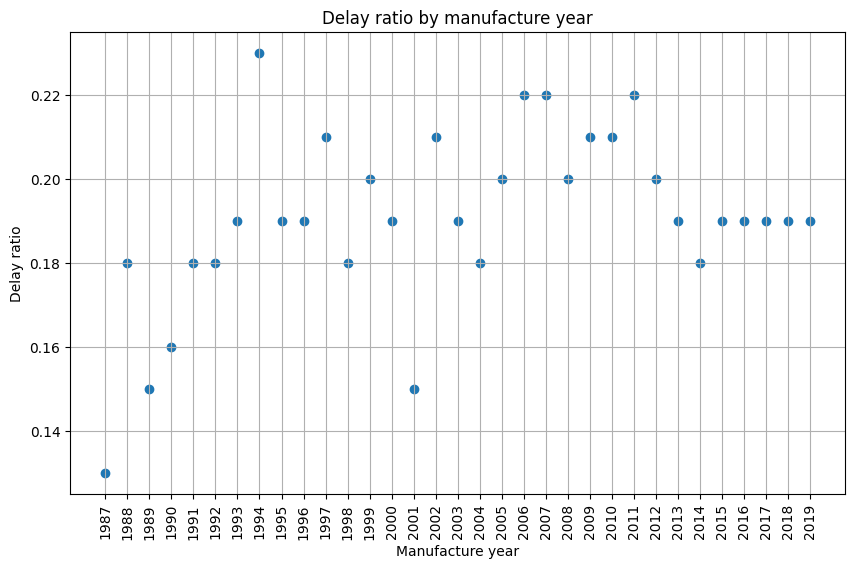

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(delays_by_manufacture_year.index, delays_by_manufacture_year)
plt.xticks(delays_by_manufacture_year.index, rotation=90)
plt.ylabel("Delay ratio")
plt.xlabel("Manufacture year")
plt.title("Delay ratio by manufacture year")
plt.grid()

 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

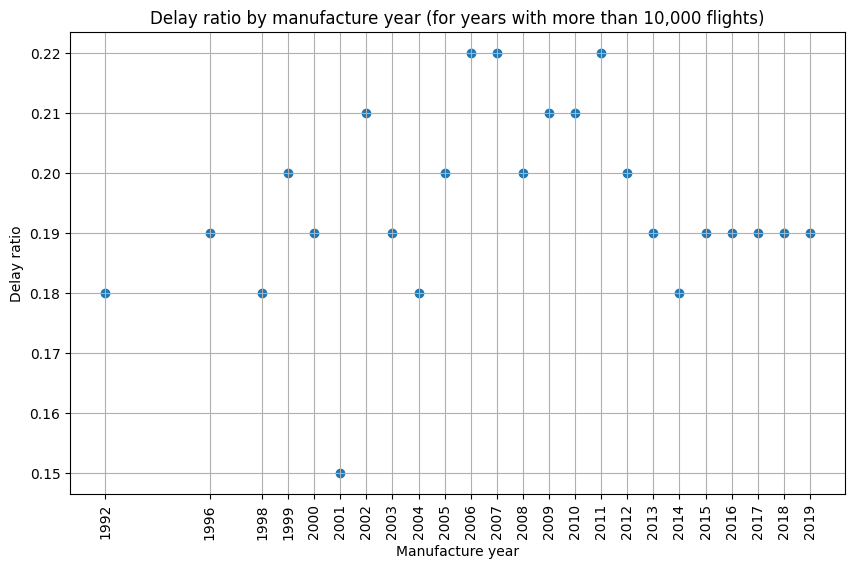

In [23]:
flights_by_manufacture_year = flight_df['manufacture_year'].value_counts()
years_with_more_than_10k_flights = flights_by_manufacture_year.loc[flights_by_manufacture_year > 10000].index
filtered_delays = delays_by_manufacture_year.loc[years_with_more_than_10k_flights]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_delays.index, filtered_delays)
plt.xticks(filtered_delays.index, rotation=90)
plt.ylabel("Delay ratio")
plt.xlabel("Manufacture year")
plt.title("Delay ratio by manufacture year (for years with more than 10,000 flights)")
plt.grid()

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [52]:
def year_grouping(year, start_year):
    if pd.isnull(year):
        return 'No manufacture year'
    
    group_num = (year - start_year) // 3
    start_range = start_year + group_num * 3
    end_range = start_range + 2
    return f'{int(start_range)}-{int(end_range)}'
min_year = flight_df['manufacture_year'].min()

flight_df['manufacture_year_agg'] = flight_df['manufacture_year'].apply(lambda year: year_grouping(year, min_year))



manufacture_year_agg
1999-2001              202484
2014-2016              185745
2017-2019              132641
2005-2007              124377
2002-2004              100192
2011-2013               96355
2008-2010               95813
1996-1998               61624
1990-1992               26369
1993-1995               18484
No manufacture year     12217
1987-1989                1090
Name: count, dtype: int64

 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [77]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed', 'is_weekend',
       'distance_agg', 'manufacture_year', 'manufacture_year_agg'],
      dtype='object')

In [88]:
flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg')['is_delayed'].mean().round(2)
flight_delays_by_manufacture_year_agg_df

manufacture_year_agg
1987-1989              0.16
1990-1992              0.17
1993-1995              0.20
1996-1998              0.19
1999-2001              0.17
2002-2004              0.19
2005-2007              0.21
2008-2010              0.21
2011-2013              0.20
2014-2016              0.18
2017-2019              0.19
No manufacture year    0.20
Name: is_delayed, dtype: float64

 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

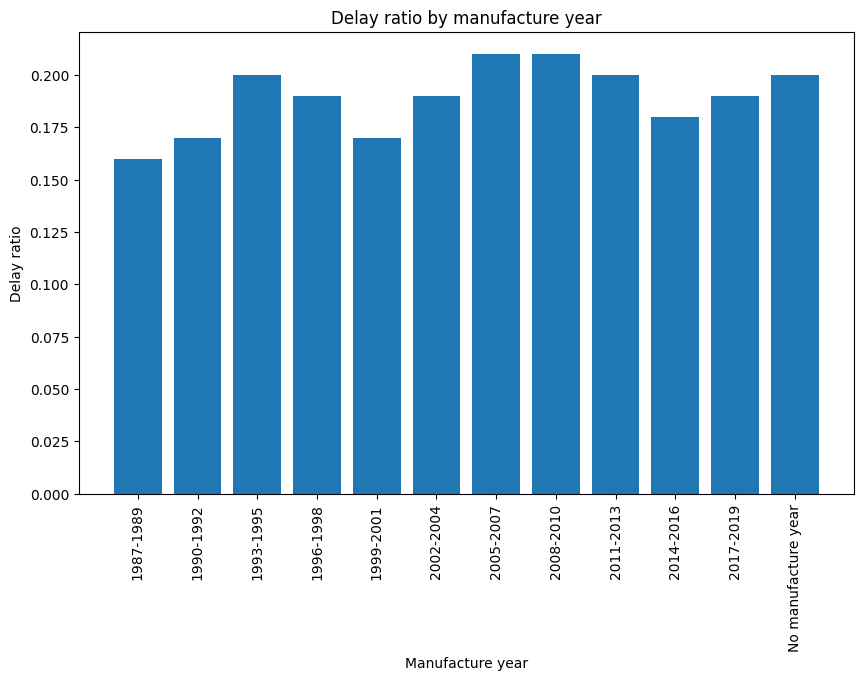

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(flight_delays_by_manufacture_year_agg_df.index, flight_delays_by_manufacture_year_agg_df)
plt.xlabel("Manufacture year")
plt.xticks(rotation=90)
plt.ylabel("Delay ratio")
plt.title("Delay ratio by manufacture year")
plt.show()

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [103]:
top_manufactured_df = flight_df.groupby('manufacture_year_agg')
total_flights = top_manufactured_df['id'].count()

top_manufactured_df = pd.DataFrame({
    'total_flights': total_flights,
    'delay_ratio': flight_delays_by_manufacture_year_agg_df,
}).reset_index()
top_manufactured_df.sort_values(by='total_flights', ascending=False).head(5)


,manufacture_year_agg,total_flights,delay_ratio
4,1999-2001,202484,0.17
9,2014-2016,185745,0.18
10,2017-2019,132641,0.19
6,2005-2007,124377,0.21
5,2002-2004,100192,0.19


 # Podsumowanie
 W tym notatniku do naszej wyjściowej ramki danych `flight_df` dołączyliśmy tabelę `aircraft_df` i za jej pomocą dodaliśmy kolejny wymiar do naszej analizy. Zauważmy, ile dodatkowych wniosków mogliśmy wyciągnąć dzięki jej dodaniu.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę z nazwą nawiązującą do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób

In [91]:
flight_df.to_csv('../data/processed/flight_df_02.csv', index=False, sep=';', encoding='utf-8')